In [1]:
!pip install langchain-community langchain-huggingface neo4j langchain-experimental python-dotenv streamlit pyngrok pypdf


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.3/312.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.3/423.3 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.

In [2]:
!pip install pyngrok
from pyngrok import ngrok
!streamlit config show 2>/dev/null
!mkdir -p ~/.streamlit
!echo "[server]" > ~/.streamlit/config.toml
!echo "headless = true" >> ~/.streamlit/config.toml
!echo "port = 8501" >> ~/.streamlit/config.toml


 # Below are all the sections and options you can have in
 ~/.streamlit/config.toml.
 

[global]

# By default, Streamlit displays a warning when a user sets both a widget
# default value in the function defining the widget and a widget value via
# the widget's key in `st.session_state`.

# If you'd like to turn off this warning, set this to True.

# Default: false
# disableWidgetStateDuplicationWarning = false

# If True, will show a warning when you run a Streamlit-enabled script
# via "python my_script.py".

# Default: true
# showWarningOnDirectExecution = true


[logger]

# Level of logging for Streamlit's internal logger: "error", "warning",
# "info", or "debug".

# Default: "info"
# level = "info"

# String format for logging messages. If logger.datetimeFormat is set,
# logger messages will default to `%(asctime)s.%(msecs)03d %(message)s`.

# See Python's documentation for available attributes:
# https://docs.python.org/3/library/logging.html#formatter-objects

# Default: "%(asc

In [3]:
!pip install python-dotenv

In [4]:
!pip install -U langchain-community

In [5]:
!pip install json-repair langchain-experimental

In [6]:
from huggingface_hub import login
login(token="")

In [7]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 3.9 MB/s eta 0:00:00


In [8]:
!pip install langchain-groq

In [9]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.7 MB/s eta 0:00:00


In [20]:
import os
from dotenv import load_dotenv
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.schema import Document
from langchain.prompts import PromptTemplate
from langchain.vectorstores import Neo4jVector
from langchain_groq import ChatGroq
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.graphs import Neo4jGraph
from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain.chains.graph_qa.cypher import GraphCypherQAChain
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import EmbeddingsFilter
from langchain.schema.runnable import RunnablePassthrough, RunnableLambda
from langchain.schema.output_parser import StrOutputParser
import streamlit as st
import tempfile
from neo4j import GraphDatabase
import time

# Load environment variables
load_dotenv()
os.environ["GROQ_API_KEY"] = "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"

def main():
    st.set_page_config(
        layout="wide",
        page_title="Hybrid GraphRAG",
        page_icon=":graph:"
    )
    st.sidebar.markdown("# 📊 Hybrid GraphRAG")
    with st.sidebar.expander("About"):
        st.markdown("""
        This application implements a hybrid RAG system combining both vector search and graph-based retrieval.

        Benefits:
        - Faster retrieval using vector search for initial context
        - More accurate answers by navigating graph relationships
        - Better context handling through the combination approach

        It leverages LangChain with Groq LLM and HuggingFace embeddings to query the Neo4j database efficiently.
        """)

    st.title("Hybrid GraphRAG: Vector + Graph Retrieval")

    # Get API key from environment or let user input it
    groq_api_key = os.getenv("GROQ_API_KEY", "")

    if not groq_api_key:
        groq_api_key = st.sidebar.text_input("Groq API Key:", type="password")
        if not groq_api_key:
            st.warning("Please enter your Groq API key to proceed.")
            return

    # Initialize Groq model
    llm = ChatGroq(
        api_key=groq_api_key,
        model_name="llama3-70b-8192",  # Using Llama 3 70B model
        temperature=0.1,
        max_tokens=2048
    )

    embeddings = HuggingFaceEmbeddings(
        model_name="sentence-transformers/all-MiniLM-L6-v2",
        model_kwargs={'device': 'cuda'}
    )

    st.session_state['embeddings'] = embeddings
    st.session_state['llm'] = llm

    # Neo4j connection config
    neo4j_url = "neo4j+s://86774861.databases.neo4j.io"
    neo4j_username = "neo4j"
    neo4j_password = "bGg2O4Rtrq--h19RJi-3xa-YETEP9r8n4P_1a3weOKo"

    graph = None

    st.sidebar.subheader("Connect to Neo4j Database")
    neo4j_url = st.sidebar.text_input("Neo4j URL:", value=neo4j_url)
    neo4j_username = st.sidebar.text_input("Neo4j Username:", value=neo4j_username)
    neo4j_password = st.sidebar.text_input("Neo4j Password:", type='password', value=neo4j_password)
    connect_button = st.sidebar.button("Connect")

    if connect_button:
        try:
            graph = Neo4jGraph(url=neo4j_url, username=neo4j_username, password=neo4j_password)
            st.session_state['graph'] = graph
            st.success("✅ Connected to Neo4j.")
        except Exception as e:
            st.error(f"❌ Failed to connect to Neo4j: {e}")
            return

    if 'graph' in st.session_state:
        graph = st.session_state['graph']
        uploaded_file = st.file_uploader("📄 Upload a PDF file", type="pdf")

        if uploaded_file and 'hybrid_chain' not in st.session_state:
            with st.spinner("Processing document..."):
                with tempfile.NamedTemporaryFile(delete=False, suffix=".pdf") as tmp_file:
                    tmp_file.write(uploaded_file.read())
                    tmp_file_path = tmp_file.name

                loader = PyPDFLoader(tmp_file_path)
                pages = loader.load_and_split()
                text_splitter = RecursiveCharacterTextSplitter(chunk_size=200, chunk_overlap=40)
                docs = text_splitter.split_documents(pages)

                lc_docs = [Document(page_content=doc.page_content.replace("\n", ""), metadata={'source': uploaded_file.name}) for doc in docs]

                graph.query("MATCH (n) DETACH DELETE n;")

                transformer = LLMGraphTransformer(
                    llm=llm,
                    allowed_nodes=["Patient", "Disease", "Medication", "Test", "Symptom", "Doctor"],
                    allowed_relationships=["HAS_DISEASE", "TAKES_MEDICATION", "UNDERWENT_TEST", "HAS_SYMPTOM", "TREATED_BY"],
                    node_properties=False,
                    relationship_properties=False
                )

                graph_docs = transformer.convert_to_graph_documents(lc_docs)
                graph.add_graph_documents(graph_docs, include_source=True)

                vector_store = Neo4jVector.from_documents(
                    documents=lc_docs,
                    embedding=embeddings,
                    url=neo4j_url,
                    username=neo4j_username,
                    password=neo4j_password,
                    database="neo4j",
                    index_name="vector_index",
                    node_label="Document",
                    text_node_property="content",
                    embedding_node_property="embedding",
                    create_id_index=True,
                    hybrid_search=True
                )

                schema = graph.get_schema
                vector_retriever = vector_store.as_retriever(search_kwargs={"k": 3})
                embeddings_filter = EmbeddingsFilter(embeddings=embeddings, similarity_threshold=0.7)
                compression_retriever = ContextualCompressionRetriever(
                    base_compressor=embeddings_filter, base_retriever=vector_retriever
                )

                cypher_prompt = PromptTemplate(
                    template="""
                    Task: Generate a Cypher statement to query the graph database using the context and question.

                    Context:
                    {context}

                    Schema:
                    {schema}

                    Question: {question}

                    Return only the Cypher query.
                    """,
                    input_variables=["schema", "question", "context"]
                )

                qa = GraphCypherQAChain.from_llm(llm=llm, graph=graph, cypher_prompt=cypher_prompt, verbose=True)

                def generate_context(query):
                    docs = compression_retriever.get_relevant_documents(query)
                    context_texts = [doc.page_content for doc in docs]
                    return {"context": "\n\n".join(context_texts), "question": query}

                def enrich_with_graph_response(data):
                    try:
                       graph_output = qa.invoke({"query": data["question"], "context": data["context"]})
                       return {
                           "context": data["context"],
                           "graph_results": graph_output.get("result", "Graph did not return any answer."),
                           "question": data["question"]
                      }
                   except Exception as e:
                       return {
                           "context": data["context"],
                           "graph_results": f"Error accessing graph: {str(e)}",
                           "question": data["question"]
                      }

                final_prompt = PromptTemplate(
                    template="""
                    Answer the following question using the provided context and graph results.

                    Context: {context}
                    Graph Results: {graph_results}
                    Question: {question}

                    Respond with a concise answer.
                    """,
                    input_variables=["context", "graph_results", "question"]
                )

                hybrid_chain = (
                    RunnableLambda(generate_context)
                    | RunnableLambda(enrich_with_graph_response)
                    | RunnableLambda(lambda x: {
                        "context": x["context"],
                        "graph_results": qa.invoke({"query": x["question"], "context": x["context"]})["result"],
                        "question": x["question"]
                    })
                    | final_prompt
                    | llm
                    | StrOutputParser()
                )

                st.session_state['hybrid_chain'] = hybrid_chain

    if 'hybrid_chain' in st.session_state:
        st.subheader("Ask Your Question")
        question = st.text_input("Type your question:")
        if st.button("Submit"):
            with st.spinner("Getting answer..."):
                start = time.time()
                answer = st.session_state['hybrid_chain'].invoke(question)
                st.success(answer)
                st.caption(f"Answered in {time.time() - start:.2f} seconds")

if __name__ == "__main__":
    main()

2025-04-09 06:56:18.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 06:56:18.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 06:56:18.373 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 06:56:18.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 06:56:18.375 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 06:56:18.375 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 06:56:18.376 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-09 06:56:18.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [16]:
# ✅ Install required libraries
!pip install -q streamlit pyngrok

# ✅ Kill any previous tunnels
from pyngrok import ngrok
ngrok.kill()

# ✅ Import other libs
import os
import time
from IPython.display import Markdown, display

# ✅ Set your ngrok auth token (replace with your own if needed)
!ngrok authtoken 2vTsuynMKTLsBZrKrygjmCwLFcW_3je8jBuVbcuNzt8kujGBm

# ✅ Start the Streamlit app
!nohup streamlit run app.py --server.port 8501 > /dev/null 2>&1 &

# ✅ Wait a few seconds for Streamlit to launch
time.sleep(5)

# ✅ Create the public ngrok tunnel (use 'addr', not 'port')
public_url = ngrok.connect(addr="8501", proto="http")

# ✅ Print and display link
print(f"✅ Streamlit is running at: {public_url}")
display(Markdown(f"[🚀 Open the Streamlit app]({public_url})"))


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
✅ Streamlit is running at: NgrokTunnel: "https://1729-34-127-95-57.ngrok-free.app" -> "http://localhost:8501"


[🚀 Open the Streamlit app](NgrokTunnel: "https://1729-34-127-95-57.ngrok-free.app" -> "http://localhost:8501")

In [ ]:
# groq api key -> 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

In [5]:
import os
import tempfile
import time
from dotenv import load_dotenv

import gradio as gr
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.schema import Document
from langchain.prompts import PromptTemplate
from langchain.vectorstores import Neo4jVector
from langchain_groq import ChatGroq
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.graphs import Neo4jGraph
from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain.chains.graph_qa.cypher import GraphCypherQAChain
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import EmbeddingsFilter
from langchain.schema.runnable import RunnableLambda
from langchain.schema.output_parser import StrOutputParser

# Load environment variables
load_dotenv()

# Initialize session variables
session = {
    "graph": None,
    "embeddings": None,
    "llm": None,
    "hybrid_chain": None,
    "document_processed": False
}

# Default Neo4j credentials
default_neo4j = {
    "url": "neo4j+s://28d1b343.databases.neo4j.io",
    "username": "neo4j",
    "password": "33JdF8onjsVoSbmEim68Yy3R24qFTrWZcGVvYZMdMF8"
}

def connect_to_neo4j(neo4j_url, neo4j_username, neo4j_password):
    """Connect to Neo4j database and return status message"""
    try:
        graph = Neo4jGraph(
            url=neo4j_url,
            username=neo4j_username,
            password=neo4j_password
        )
        session["graph"] = graph
        session["neo4j_url"] = neo4j_url
        session["neo4j_username"] = neo4j_username
        session["neo4j_password"] = neo4j_password

        return "✅ Successfully connected to Neo4j database!"
    except Exception as e:
        return f"❌ Failed to connect to Neo4j: {str(e)}"

def initialize_llm(groq_api_key):
    """Initialize Groq LLM and embeddings"""
    if not groq_api_key:
        return "❌ Please provide a Groq API key"

    try:
        # Initialize Groq LLM
        llm = ChatGroq(
            api_key=groq_api_key,
            model_name="gemma2-9b-it",
            temperature=0.1,
            max_tokens=1024
        )

        # Initialize embeddings
        embeddings = HuggingFaceEmbeddings(
            model_name="sentence-transformers/all-MiniLM-L6-v2",
            model_kwargs={'device': 'cuda'}
        )

        session["llm"] = llm
        session["embeddings"] = embeddings

        return "✅ Successfully initialized Groq LLM and embeddings!"
    except Exception as e:
        return f"❌ Error initializing models: {str(e)}"

def process_document(pdf_file):
    """Process PDF document and build graph + vector store"""
    if not session.get("graph"):
        return "❌ Please connect to Neo4j first"

    if not session.get("llm") or not session.get("embeddings"):
        return "❌ Please initialize LLM first"

    if pdf_file is None:
        return "❌ Please upload a PDF file"

    graph = session["graph"]
    llm = session["llm"]
    embeddings = session["embeddings"]

    try:
        # Create temporary file
        with tempfile.NamedTemporaryFile(delete=False, suffix=".pdf") as tmp_file:
            # Properly handle the file from Gradio
            with open(pdf_file.name, "rb") as f:
                tmp_file.write(f.read())
            tmp_file_path = tmp_file.name

        # Load and split document
        loader = PyPDFLoader(tmp_file_path)
        pages = loader.load_and_split()[:5]
        text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
        docs = text_splitter.split_documents(pages)

        MAX_CHUNKS = 10
        docs = docs[:MAX_CHUNKS]


        # Process documents
        lc_docs = [Document(page_content=doc.page_content.replace("\n", ""),
                           metadata={'source': os.path.basename(pdf_file.name)})
                   for doc in docs]

        # Clear existing data
        graph.query("MATCH (n) DETACH DELETE n;")

        # Transform documents to graph
        transformer = LLMGraphTransformer(
            llm=llm,
            allowed_nodes=["Patient", "Disease", "Medication", "Test", "Symptom", "Doctor"],
            allowed_relationships=["HAS_DISEASE", "TAKES_MEDICATION", "UNDERWENT_TEST", "HAS_SYMPTOM", "TREATED_BY"],
            node_properties=False,
            relationship_properties=False
        )

        graph_docs = transformer.convert_to_graph_documents(lc_docs)
        graph.add_graph_documents(graph_docs, include_source=True)

        # Get Neo4j credentials from the current graph connection
        neo4j_url = session["neo4j_url"]
        neo4j_username = session["neo4j_username"]
        neo4j_password = session["neo4j_password"]


        # Create vector store
        vector_store = Neo4jVector.from_documents(
            documents=lc_docs,
            embedding=embeddings,
            url=neo4j_url,
            username=neo4j_username,
            password=neo4j_password,
            database="neo4j",
            index_name="vector_index",
            node_label="Document",
            text_node_property="content",
            embedding_node_property="embedding",
            create_id_index=True,
            #hybrid_search=True
        )

        # Set up retrieval chain
        schema = graph.get_schema
        vector_retriever = vector_store.as_retriever(search_kwargs={"k": 3})
        embeddings_filter = EmbeddingsFilter(embeddings=embeddings, similarity_threshold=0.7)
        compression_retriever = ContextualCompressionRetriever(
            base_compressor=embeddings_filter, base_retriever=vector_retriever
        )

        # Create Cypher query chain
        cypher_prompt = PromptTemplate(
            template="""
            Task: Generate a Cypher statement to query the graph database using the context and question.

            Context:
            {context}

            Schema:
            {schema}

            Question: {question}

            Return only the Cypher query.
            """,
            input_variables=["schema", "question", "context"]
        )

        qa = GraphCypherQAChain.from_llm(llm=llm, graph=graph, cypher_prompt=cypher_prompt, verbose=True,allow_dangerous_requests=True)

        # Create context generation function
        def generate_context(query):
            docs = compression_retriever.get_relevant_documents(query)
            context_texts = [doc.page_content for doc in docs]
            return {"context": "\n\n".join(context_texts), "question": query}


        def enrich_with_graph_response(data):
            try:
               graph_output = qa.invoke({"query": data["question"], "context": data["context"]})
               return {
                   "context": data["context"],
                   "graph_results": graph_output.get("result", "Graph did not return any answer."),
                   "question": data["question"]
               }
            except Exception as e:
                return {
                    "context": data["context"],
                    "graph_results": f"Error accessing graph: {str(e)}",
                    "question": data["question"]
                }


        # Create final prompt
        final_prompt = PromptTemplate(
            template="""
            Answer the following question using the provided context and graph results.

            Context: {context}
            Graph Results: {graph_results}
            Question: {question}

            Respond with a concise answer.
            """,
            input_variables=["context", "graph_results", "question"]
        )

        # Build hybrid chain
        hybrid_chain = (
            RunnableLambda(generate_context)
            | RunnableLambda(enrich_with_graph_response)
            | RunnableLambda(lambda x: {
                "context": x["context"],
                "graph_results": qa.invoke({"query": x["question"], "context": x["context"]})["result"],
                "question": x["question"]
            })
            | final_prompt
            | llm
            | StrOutputParser()
        )

        session["hybrid_chain"] = hybrid_chain
        session["document_processed"] = True

        return "✅ Document processed successfully! You can now ask questions."
    except Exception as e:
        import traceback
        return f"❌ Error processing document: {str(e)}\n{traceback.format_exc()}"
    finally:
        # Clean up temporary file
        if 'tmp_file_path' in locals():
            try:
                os.unlink(tmp_file_path)
            except:
                pass

def ask_question(question):
    """Process a question and return the answer"""
    if not session.get("document_processed"):
        return "❌ Please process a document first"

    if not question.strip():
        return "❌ Please enter a question"

    try:
        start = time.time()
        answer = session["hybrid_chain"].invoke(question)
        elapsed = time.time() - start

        return f"{answer}\n\n(Answered in {elapsed:.2f} seconds)"
    except Exception as e:
        return f"❌ Error: {str(e)}"

def create_app():
    """Create Gradio application"""
    with gr.Blocks(title="Hybrid GraphRAG", theme=gr.themes.Soft()) as app:
        gr.Markdown("# 📊 GraphRAG: Vector + Graph Retrieval")

        gr.Markdown("""
        This application implements a hybrid RAG system combining both vector search and graph-based retrieval.

        Benefits:
        - Faster retrieval using vector search for initial context
        - More accurate answers by navigating graph relationships
        - Better context handling through the combination approach

        It leverages LangChain with Groq LLM and HuggingFace embeddings to query the Neo4j database efficiently.
        """)

        with gr.Tabs():
            with gr.Tab("Setup"):
                with gr.Row():
                    with gr.Column():
                        gr.Markdown("### Step 1: Connect to Neo4j")
                        neo4j_url = gr.Textbox(
                            label="Neo4j URL",
                            value=default_neo4j["url"],
                            info="Enter your Neo4j database URL"
                        )
                        neo4j_username = gr.Textbox(
                            label="Neo4j Username",
                            value=default_neo4j["username"],
                            info="Enter your Neo4j username"
                        )
                        neo4j_password = gr.Textbox(
                            label="Neo4j Password",
                            value=default_neo4j["password"],
                            type="password",
                            info="Enter your Neo4j password"
                        )
                        neo4j_connect_btn = gr.Button("Connect to Neo4j", variant="primary")
                        neo4j_status = gr.Textbox(label="Connection Status", interactive=False)

                    with gr.Column():
                        gr.Markdown("### Step 2: Initialize LLM")
                        groq_api_key = gr.Textbox(
                            label="Groq API Key",
                            type="password",
                            info="Enter your Groq API key",
                            value=os.environ.get("GROQ_API_KEY", "")
                        )
                        llm_init_btn = gr.Button("Initialize LLM", variant="primary")
                        llm_status = gr.Textbox(label="LLM Status", interactive=False)

                gr.Markdown("### Step 3: Process Document")
                pdf_file = gr.File(
                    label="Upload PDF Document",
                    file_types=[".pdf"],
                    #info="Upload a PDF document to process"
                )
                process_btn = gr.Button("Process Document", variant="primary")
                process_status = gr.Textbox(label="Processing Status", interactive=False)

            with gr.Tab("Ask Questions"):
                gr.Markdown("### Query the Document")
                question = gr.Textbox(label="Your Question", placeholder="Ask a question about the document...")
                ask_btn = gr.Button("Ask", variant="primary")
                answer = gr.Textbox(label="Answer", interactive=False, lines=10)

        # Set up event handlers
        neo4j_connect_btn.click(
            connect_to_neo4j,
            inputs=[neo4j_url, neo4j_username, neo4j_password],
            outputs=neo4j_status
        )

        llm_init_btn.click(
            initialize_llm,
            inputs=[groq_api_key],
            outputs=llm_status
        )

        process_btn.click(
            process_document,
            inputs=[pdf_file],
            outputs=process_status
        )

        ask_btn.click(
            ask_question,
            inputs=[question],
            outputs=answer
        )

        question.submit(
            ask_question,
            inputs=[question],
            outputs=answer
        )

    return app

if __name__ == "__main__":
    app = create_app()
    app.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://f13634c6a5219df2b6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)




> Entering new GraphCypherQAChain chain...
Generated Cypher:
cypher
MATCH (p:Patient {id: "YOUR_PATIENT_ID"})<-[:MENTIONS]-(d:Document)
WHERE d.source = "FAMILY_HISTORY"
RETURN d.text

Full Context:
[]

> Finished chain.


> Entering new GraphCypherQAChain chain...
Generated Cypher:
cypher
MATCH (p:Patient {id: "YOUR_PATIENT_ID"})<-[:MENTIONS]-(d:Document)
WHERE d.source = "FAMILY_HISTORY"
RETURN d.text

Full Context:
[]

> Finished chain.


> Entering new GraphCypherQAChain chain...
Generated Cypher:
cypher
MATCH (d:Document)
WHERE d.id = {documentId}
RETURN d.text AS summary



> Entering new GraphCypherQAChain chain...
Generated Cypher:
cypher
MATCH (d:Document)
RETURN d.text AS summary

Full Context:
[{'summary': 'Comprehensive Adult History and Physical  (Sample Summative H&P by M2 Student)  Chief Complaint:  “I got lightheadedness and felt too weak to walk” Source and Setting: Patient reported in an in-patient setting on Day 2 of his hospitalization.   History of Present Illnes

Full Context:
[]

> Finished chain.


> Entering new GraphCypherQAChain chain...


Generated Cypher:
cypher
MATCH (p:Patient {id: "your_patient_id"})<-[:HAS_DISEASE]-(d:Disease {name: "Rheumatoid Arthritis"})
MATCH (d)-[:TREATS]->(m:Medication)
RETURN m.id

Full Context:
[]

> Finished chain.
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://f13634c6a5219df2b6.gradio.live


In [6]:
from neo4j import GraphDatabase

uri = "neo4j+s://28d1b343.databases.neo4j.io"
username = "neo4j"
password = "33JdF8onjsVoSbmEim68Yy3R24qFTrWZcGVvYZMdMF8"

driver = GraphDatabase.driver(uri, auth=(username, password))
with driver.session() as session:
    result = session.run("MATCH (n) RETURN count(n) AS count")
    print(result.single()["count"])


37


In [7]:
!pip install --quiet neo4j networkx pyvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.3 MB/s eta 0:00:00


In [8]:
from neo4j import GraphDatabase

uri = "neo4j+s://28d1b343.databases.neo4j.io"
username = "neo4j"
password = "33JdF8onjsVoSbmEim68Yy3R24qFTrWZcGVvYZMdMF8"

driver = GraphDatabase.driver(uri, auth=(username, password))


In [9]:
def fetch_graph_data(driver, limit=100):
    query = """
    MATCH (n)-[r]->(m)
    RETURN n, type(r) AS rel_type, m
    LIMIT $limit
    """
    with driver.session() as session:
        results = session.run(query, limit=limit)
        edges = []
        nodes = {}
        for record in results:
            n = record["n"]
            m = record["m"]
            rel = record["rel_type"]
            n_id = str(n.id)
            m_id = str(m.id)

            nodes[n_id] = n.labels if hasattr(n, "labels") else ["Node"]
            nodes[m_id] = m.labels if hasattr(m, "labels") else ["Node"]

            edges.append((n_id, m_id, rel))
        return nodes, edges


In [14]:
from pyvis.network import Network
from IPython.display import display, HTML

def visualize_graph(nodes, edges):
    net = Network(notebook=True, height="600px", width="100%", bgcolor="#ffffff", font_color="black")

    for node_id, labels in nodes.items():
        net.add_node(node_id, label=",".join(labels))

    for source, target, label in edges:
        net.add_edge(source, target, label=label)

    net.show("graph.html")
    display(HTML("graph.html"))
    net.show("graph.html")  # saves the file
#from google.colab import files
#files.download("graph.html")  # prompts download so you can open it locally
from IPython.display import IFrame
display(IFrame("graph.html", width="100%", height="600px"))



In [11]:
nodes, edges = fetch_graph_data(driver)
visualize_graph(nodes, edges)


<ipython-input-9-b5ea0af05bce>:15: DeprecationWarning: `id` is deprecated, use `element_id` instead
  n_id = str(n.id)
<ipython-input-9-b5ea0af05bce>:16: DeprecationWarning: `id` is deprecated, use `element_id` instead
  m_id = str(m.id)


graph.html


In [15]:
from pyvis.network import Network
from IPython.display import IFrame

def visualize_graph(nodes, edges):
    net = Network(notebook=True, height="600px", width="100%", cdn_resources='in_line')
    for node_id, labels in nodes.items():
        net.add_node(node_id, label=",".join(labels))
    for source, target, label in edges:
        net.add_edge(source, target, label=label)
    net.show("graph.html")
    display(IFrame("graph.html", width="100%", height="600px"))


In [16]:
from pyvis.network import Network
from IPython.display import IFrame
import random

def visualize_graph(nodes, edges):
    net = Network(notebook=True, height="600px", width="100%", cdn_resources="in_line")

    # Assign random colors to each node label group
    label_colors = {}
    for labels in nodes.values():
        for label in labels:
            if label not in label_colors:
                label_colors[label] = "#{:06x}".format(random.randint(0, 0xFFFFFF))

    # Add nodes with group color
    for node_id, labels in nodes.items():
        label = labels[0]  # Primary label
        net.add_node(
            node_id,
            label=label,
            title=",".join(labels),
            color=label_colors.get(label, "#cccccc"),
            group=label
        )

    # Assign edge colors based on relationship type
    rel_colors = {}
    for _, _, rel in edges:
        if rel not in rel_colors:
            rel_colors[rel] = "#{:06x}".format(random.randint(0, 0xFFFFFF))

    # Add edges with type label and color
    for source, target, rel in edges:
        net.add_edge(
            source, target,
            label=rel,
            color=rel_colors.get(rel, "#999999"),
            title=rel
        )

    net.show("graph.html")
    display(IFrame("graph.html", width="100%", height="600px"))


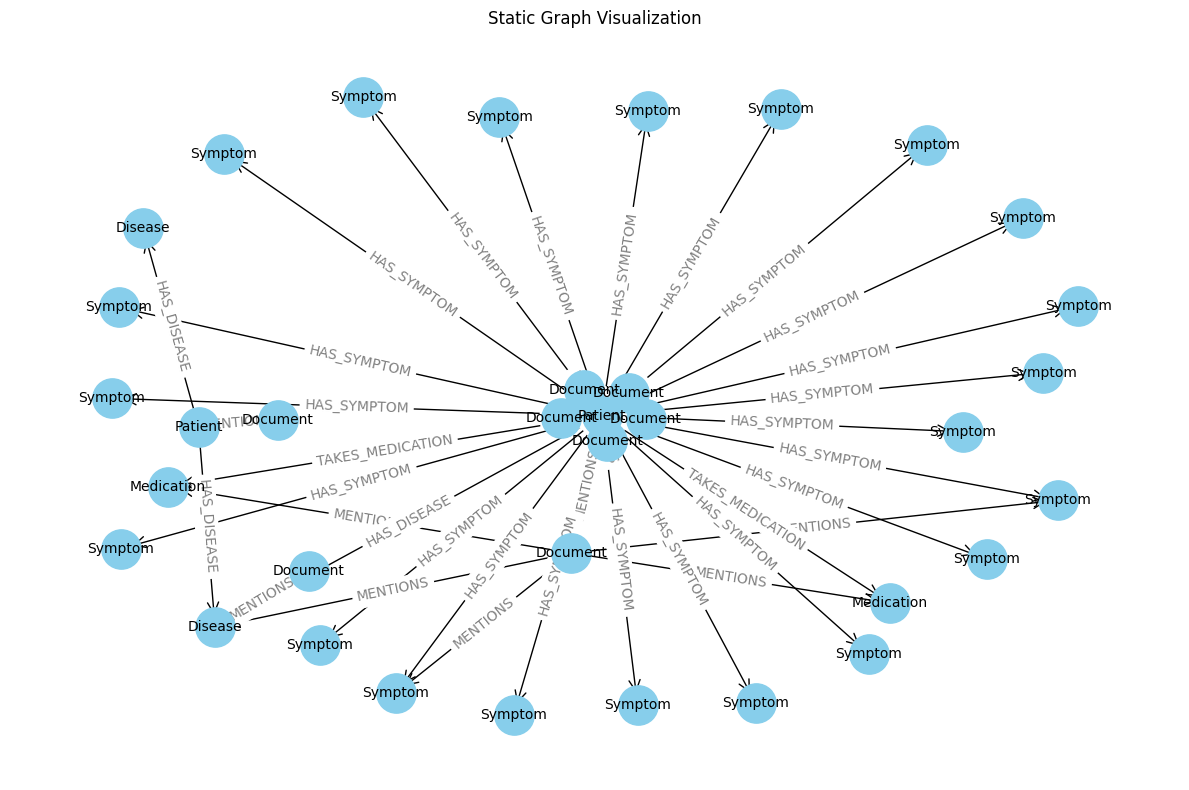

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files

def visualize_graph_static(nodes, edges):
    G = nx.DiGraph()

    for node_id, labels in nodes.items():
        # Convert the frozenset to a list before accessing elements
        G.add_node(node_id, label=list(labels)[0] if labels else "Unknown")

    for source, target, rel in edges:
        G.add_edge(source, target, label=rel)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(12, 8))

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=800)

    # Draw edges
    nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=20)

    # Draw node labels
    labels = nx.get_node_attributes(G, 'label')
    nx.draw_networkx_labels(G, pos, labels, font_size=10)

    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='gray')

    plt.axis("off")
    plt.title("Static Graph Visualization")
    plt.tight_layout()
    plt.savefig("static_graph.png", dpi=300)
    plt.show()

# Call the function to generate the PNG file first
visualize_graph_static(nodes, edges)

# Download the file after it is created.
files.download("static_graph.png")